### Load Data / Brief Introduction


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# load_iris()['data']
# load_iris()['feature_names']
# load_iris()['target']
# load_iris()['target_names']

# Feature Names (x)
# iris['feature_names']
# To distinguish (y)
# iris['target_names']

df_iris = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df_iris

RecursionError: maximum recursion depth exceeded while getting the repr of an object

In [5]:

df_iris['Type'] = iris['target']
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type,Target Names
0,5.1,3.5,1.4,0.2,0,Versicolor
1,4.9,3.0,1.4,0.2,0,Versicolor
2,4.7,3.2,1.3,0.2,0,Versicolor
3,4.6,3.1,1.5,0.2,0,Versicolor
4,5.0,3.6,1.4,0.2,0,Versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Setosa
146,6.3,2.5,5.0,1.9,2,Setosa
147,6.5,3.0,5.2,2.0,2,Setosa
148,6.2,3.4,5.4,2.3,2,Setosa


In [12]:
### Assign Name to each type, instead of 0, 1, and 2, with column name - Target Names
### Why?
### 실습 0 - 'Versicolor' / 1 - 'Virginica' / 2 - 'Setosa'

#apply dictionary 이용

dict_keys = {0: 'Versicolor',1: 'Virginica', 3:'Setosa' }
df_iris['Target Names']= df_iris['Type'].apply(lambda x: dict_keys[x])
df_iris

KeyError: 'Versicolor'

### Visualization

#### Correlation Plot

In [14]:
df_iris[df_iris.columns[:4]].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


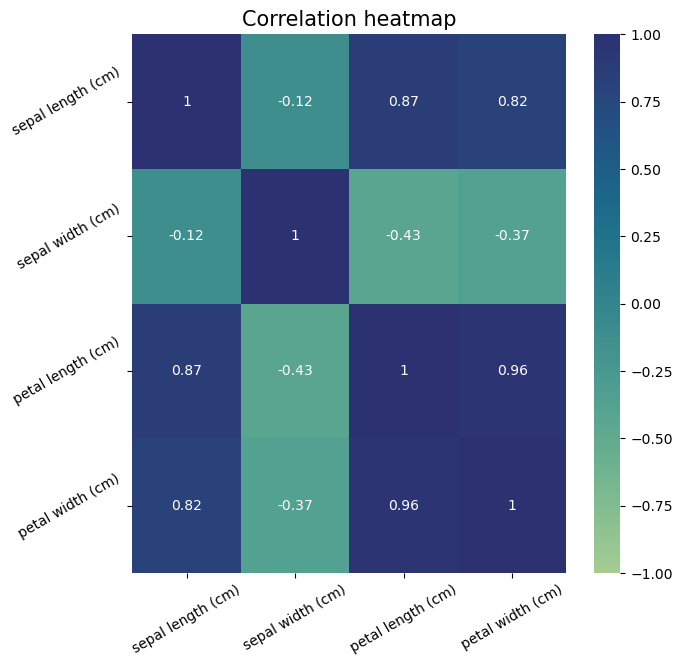

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(7,7))
sns.heatmap(df_iris[df_iris.columns[:4]].corr(), annot=True, cbar=True, vmin=-1, vmax=1, cmap="crest")
axes.tick_params(labelrotation=30)
plt.title('Correlation heatmap', fontsize = 15)

plt.show()

### 다양한 그래프

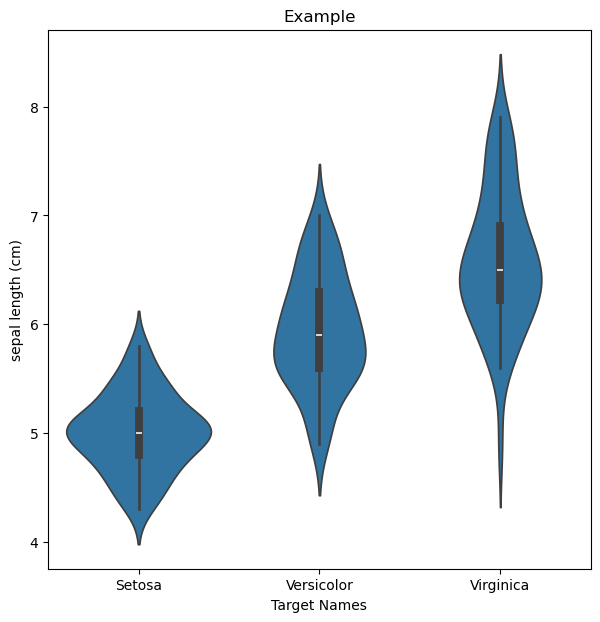

In [ ]:
# violin plot

fig, axes = plt.subplots(figsize=(7,7))
sns.violinplot(x='Target Names', y='sepal length (cm)', data=df_iris)
plt.title('Example')
plt.show()

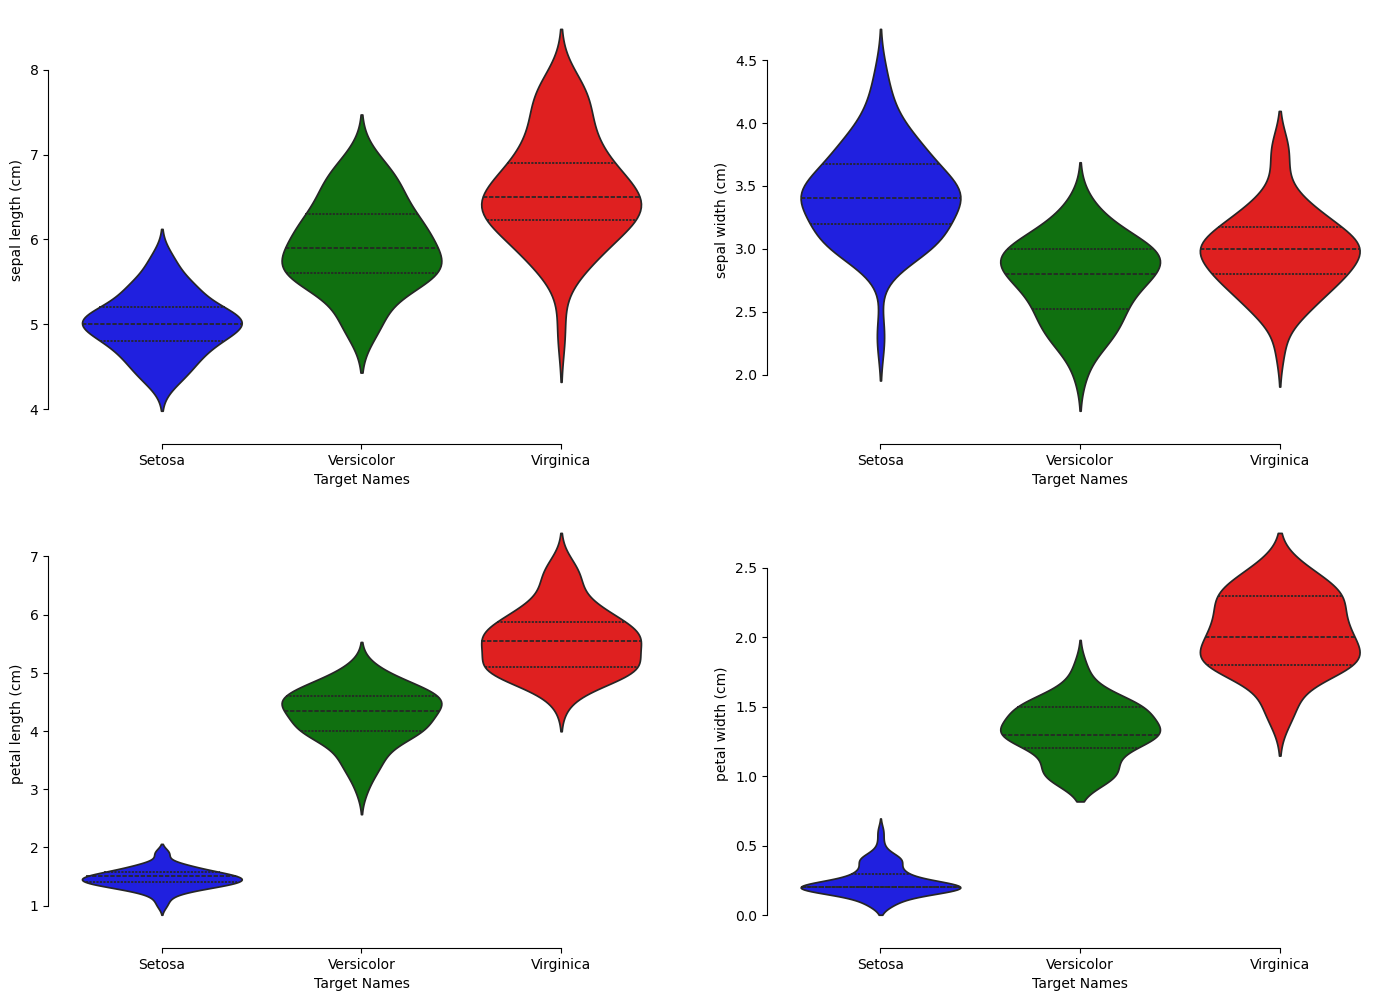

In [ ]:
# Violin Plot

def plot_violin(columns_to_plot, i):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Target Names', y=columns_to_plot, data=df_iris, inner='quart', palette={"Versicolor": "g", "Setosa": "b", "Virginica": "m"})
    # plt.ylim((0, 10))

plt.figure(figsize=(17,12))
i = 1

for column in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
    plot_violin(column, i)
    sns.despine(offset=10, trim=True)
    i += 1

plt.show()

In [ ]:
fig.axes = plt.subplot


### Preprocessing (Chapter 6)

In [ ]:
# Subset Reduction
#   > Forward / Backward
# Shrinkage
#   > Lasso / Ridge
# Decomposition
#   > PCA

# 무엇이고 / 어떻게하고 / 어떤 장&단점


다음은 각 기법에 대한 설명과 장단점입니다.

## Subset Reduction
### 무엇이고
Subset Reduction은 데이터의 차원을 줄이는 방법으로, 데이터의 중요 특성만을 선택하여 분석의 효율성을 높입니다.

### 어떻게 하고
- **Forward Selection**: 모델에 변수를 하나씩 추가하며 성능을 평가합니다.
- **Backward Elimination**: 모든 변수를 시작으로, 성능이 나쁜 변수를 하나씩 제거합니다.

### 장점
- 모델의 해석이 쉬워짐.
- 계산 비용 절감.

### 단점
- 최적의 변수를 선택하지 못할 가능성.
- 과적합의 위험.

---

## Shrinkage
### 무엇이고
Shrinkage 기법은 회귀 계수를 축소시켜 모델의 복잡성을 줄이는 방법입니다.

### 어떻게 하고
- **Lasso (L1 Regularization)**: 계수의 절대값 합에 대한 제약을 추가하여 일부 계수를 0으로 만듭니다.
- **Ridge (L2 Regularization)**: 계수의 제곱합에 대한 제약을 추가하여 계수를 0에 가깝게 만듭니다.

### 장점
- 과적합 방지.
- 변수 선택과 계수 축소를 동시에 수행.

### 단점
- Lasso는 중요한 변수를 누락할 수 있음.
- Ridge는 모든 변수를 포함하나 해석이 어려워질 수 있음.

---

## Decomposition
### 무엇이고
Decomposition은 데이터를 여러 구성 요소로 분해하여 주요 패턴을 이해하는 방법입니다.

### 어떻게 하고
- **PCA (Principal Component Analysis)**: 데이터의 분산이 가장 큰 방향으로 새로운 축을 생성하여 차원을 축소합니다.

### 장점
- 데이터의 구조를 이해하기 쉬움.
- 노이즈 제거 및 계산 효율성 향상.

### 단점
- 해석이 어려울 수 있음.
- 원래 변수의 정보를 일부 잃을 수 있음.

이 기법들은 데이터 분석 및 머신러닝에서 매우 중요한 역할을 하며, 상황에 따라 적절히 선택하여 사용해야 합니다. 

### ML (과제)

In [ ]:
# Naive-bayes - Gaussian
#   > Posterior Probability (무엇인지만)
# SVM
#   > When over three classification results are required?
#   > One-Versus-One / One-Versus-All 비교




## Naive Bayes - Gaussian
### Posterior Probability (무엇인지)
Posterior Probability는 주어진 데이터와 사전 확률을 바탕으로 특정 클래스에 속할 확률을 계산한 것입니다. 이는 베이즈 정리를 사용하여 다음과 같이 표현됩니다:

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

여기서 $P(C|X)$는 클래스 $C$의 사후 확률, $P(X|C)$는 클래스 $C$에서 관측된 데이터 $X$의 우도, $P(C)$는 클래스 $C$의 사전 확률, $P(X)$는 데이터 $X$의 전체 확률입니다.

---

## SVM
### When over three classification results are required?
SVM(서포트 벡터 머신)은 이진 분류를 위해 설계되었지만, 세 개 이상의 클래스를 분류해야 할 때는 여러 방법을 사용합니다.

### One-Versus-One / One-Versus-All 비교
- **One-Versus-One (OvO)**:
  - 각 클래스 쌍에 대해 SVM 모델을 학습합니다.
  - 예를 들어, 3개의 클래스가 있을 경우, 3개의 모델을 학습합니다: (클래스1 vs 클래스2), (클래스1 vs 클래스3), (클래스2 vs 클래스3).
  - 각 모델의 예측 결과를 종합하여 최종 클래스를 결정합니다.
  
  **장점**: 모든 클래스 쌍을 비교하므로 정확도가 높을 수 있음.
  
  **단점**: 모델 수가 급격히 증가하여 계산 비용이 높아짐.

- **One-Versus-All (OvA)**:
  - 각 클래스에 대해 하나의 SVM 모델을 학습하고, 나머지 클래스는 '부정' 클래스로 간주합니다.
  - 예를 들어, 3개의 클래스가 있을 경우, 3개의 모델을 학습합니다: (클래스1 vs 나머지), (클래스2 vs 나머지), (클래스3 vs 나머지).
  
  **장점**: 모델 수가 적어 계산 비용이 낮음.
  
  **단점**: 클래스 간의 경계가 명확하지 않을 수 있어 성능이 떨어질 수 있음.


### Cross-Validation